<a href="https://colab.research.google.com/github/jchen8000/GenerativeAI/blob/main/2_Pytorch_Basics_Math_Fundamentals/PyTorch_Basices_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.	Pytorch Basics and Math Fundamentals (Part 2)


*   2.5 Cross Entropy
*   2.6 GPU Support
*   2.7 Linear Transformation
*   2.8	Embedding





In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

## 2.5	Cross Entropy

In [2]:
# Define the softmax function
def softmax(logits):
    exp_logits = torch.exp(logits - torch.max(logits))
    sum_exp_logits = exp_logits.sum(dim=1, keepdim=True)
    return exp_logits / sum_exp_logits

# Define the cross-entropy loss function from scratch
def cross_entropy_loss(y_pred, y_true):
    y_pred_clipped = torch.clamp(y_pred, 1e-9, 1 - 1e-9)
    return -torch.sum(y_true * torch.log(y_pred_clipped))



In [3]:
# Create a separate array for the x-axis (logits for class 2)
x_axis = torch.linspace(-10, 10, steps=100)

# Generate synthetic logits for a 3-class classification problem
logits = torch.zeros((x_axis.size(0), 3))
logits[:, 1] = torch.linspace(-10, 10, steps=100)  # Varying logits for class 2
logits[:, 2] = 1  # Say, for class 3, fixed scores

# Correct class is the second one
y_true_indices = torch.tensor([1] * x_axis.size(0))
y_true = F.one_hot(y_true_indices, num_classes=3).float()

# Apply softmax to logits
probabilities = softmax(logits)

# Compute the cross-entropy loss
losses = torch.zeros(probabilities.shape[0])
for i, (probability, label) in enumerate(zip(probabilities, y_true)):
    losses[i] = cross_entropy_loss(probability, label)

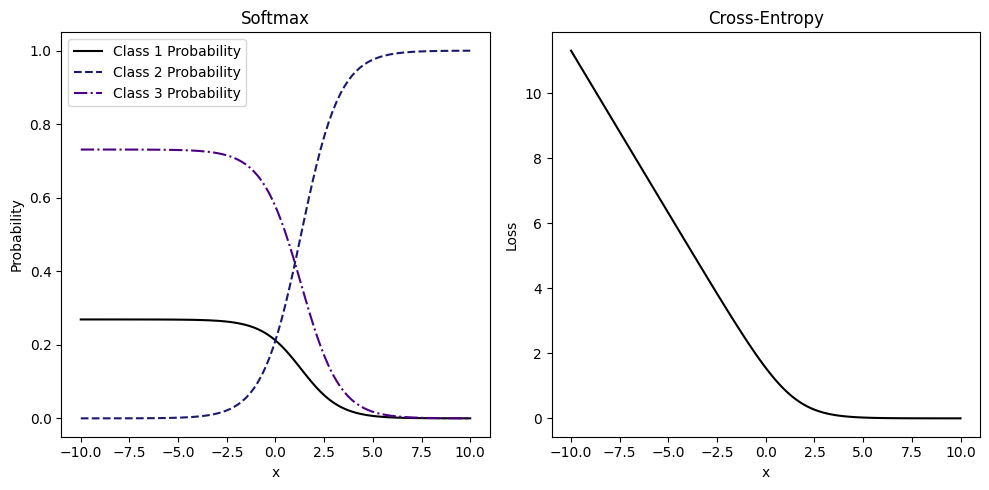

In [4]:
# Visualization
plt.figure(figsize=(10, 5))

# Subplot for softmax probabilities
plt.subplot(1, 2, 1)
plt.plot(x_axis.numpy(), probabilities[:, 0].numpy(), label="Class 1 Probability", c='k', )
plt.plot(x_axis.numpy(), probabilities[:, 1].numpy(), label="Class 2 Probability", ls='dashed', c='midnightblue' )
plt.plot(x_axis.numpy(), probabilities[:, 2].numpy(), label="Class 3 Probability", ls='dashdot', c='indigo')
plt.title('Softmax')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()

# Subplot for cross entropy loss
plt.subplot(1, 2, 2)
plt.plot(x_axis.numpy(), losses.numpy(), c='k')
plt.title('Cross-Entropy')
plt.xlabel('x')
plt.ylabel('Loss')

plt.tight_layout()
plt.savefig("cross_entropy.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

In [5]:
torch.set_printoptions(precision=3, sci_mode=False)
index = 49
print("x position:\t\t", x_axis[index])
print("True label:\t\t", y_true)
print("Softmax Probability:\t", probabilities[index,:])
print("CrossEntropy loss:\t", losses[index])

x position:		 tensor(-0.101)
True label:		 tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0.

In [6]:
y_pred = torch.tensor([0.042, 0.844, .0114])
y_true = torch.tensor([0.0, 1.0, 0.0])
print(cross_entropy_loss(y_pred, y_true))

tensor(0.170)


## 2.6 GPU Support

In [7]:
if torch.cuda.is_available():
  !nvidia-smi
else:
  print("GPU is not abailable!")

Thu Feb  8 17:27:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [9]:
import time
tensor1 = torch.randn(10000, 10000).to('cuda:0')
tensor2 = torch.randn(10000, 10000).to('cuda:0')

start_time = time.time()
rand = tensor1 @ tensor2
end_time = time.time()
print(f"GPU time: {(end_time-start_time):.8f}")

GPU time: 0.17534566


In [10]:
tensor3 = torch.randn(10000, 10000).to('cpu')
tensor4 = torch.randn(10000, 10000).to('cpu')

start_time = time.time()
rand = tensor3 @ tensor4
end_time = time.time()
print(f"CPU time: {(end_time-start_time):.8f}")

CPU time: 16.93229651


## 2.7	Linear Transformation

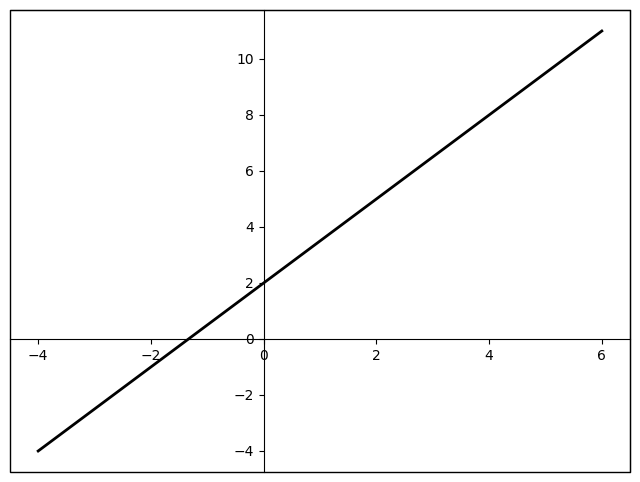

In [11]:
import numpy as np

def function(x):
    return 1.5*x + 2.0

fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(-4, 6)
ax.spines['left'].set_position('zero',)
ax.spines['bottom'].set_position('zero',)
ax.plot(x, function(x), color='k', lw=2, label='Linear Function')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.0)
plt.savefig("linear_function.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

In [12]:
import torch.nn as nn
x = torch.tensor([3.0, 2.0, 5.0])
linear = nn.Linear(3, 2)
y = linear(x)
print("Input:", x)
print("Output:", y)


Input: tensor([3., 2., 5.])
Output: tensor([-1.941,  2.826], grad_fn=<ViewBackward0>)


Total parameters:

In [13]:
total_parameter = sum(p.numel() for p in linear.parameters())
print(f"Total Parameters: {total_parameter:,}")

Total Parameters: 8


Pint out weight and bias:

In [14]:
print(linear.weight.size())
W = linear.weight
print(W)

torch.Size([2, 3])
Parameter containing:
tensor([[-0.576,  0.393, -0.170],
        [ 0.062,  0.430,  0.327]], requires_grad=True)


In [15]:
print(linear.bias.size())
B = linear.bias
print(B)

torch.Size([2])
Parameter containing:
tensor([-0.148,  0.145], requires_grad=True)


Linear Transformation is defined as:

$\begin{array}{ccl}
y & = & x \cdot W^T + B \\[8pt]
\begin{bmatrix}
y_{1} & y_{2}
\end{bmatrix} & = & \begin{bmatrix}
x_{1} & x_{2} & x_{3}
\end{bmatrix} \cdot \begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{bmatrix}^T + \begin{bmatrix}
b_{1} & b_{2}
\end{bmatrix}\\
 & = & \begin{bmatrix}
x_{1} & x_{2} & x_{3}
\end{bmatrix} \cdot \begin{bmatrix}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{bmatrix} + \begin{bmatrix}
b_{1} & b_{2}
\end{bmatrix}
\end{array}$

It can be implemented as:

In [16]:
y = x @ torch.transpose(W, -2, -1) + B
y

tensor([-1.941,  2.826], grad_fn=<AddBackward0>)

We can also disable the bias by setting bias=False:

In [17]:
linear = nn.Linear(3, 2, bias=False)

## 2.8	Embedding

In [18]:
vocab_size = 10000
embedding_dim = 512
embedding = nn.Embedding(vocab_size, embedding_dim)
sequence = torch.LongTensor([15, 236, 21, 1281])
embedded = embedding(sequence)
print(embedded.size())
print(embedded)

torch.Size([4, 512])
tensor([[ 0.247, -0.069,  0.048,  ...,  1.250, -2.239, -0.129],
        [ 0.334, -0.201, -0.908,  ..., -0.384, -0.834, -0.413],
        [-0.864,  0.540,  0.065,  ..., -0.710, -0.615, -1.279],
        [ 1.644, -0.057, -1.217,  ..., -0.023, -0.594,  2.639]],
       grad_fn=<EmbeddingBackward0>)


Print out the total parameters:

In [19]:
parameters = sum(p.numel() for p in embedding.parameters())
print(f"Total Parameters: {parameters:,}")

Total Parameters: 5,120,000
